Importing packages.

In [1]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

Plotting the graph of the function $f(x,y)=\sin{\sqrt{x^2 + y^2}}$.

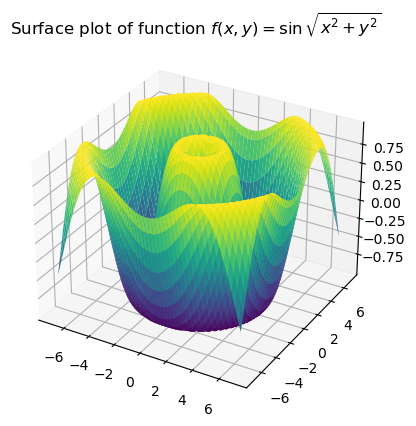

In [2]:
# Plotting the graph of the funciton f(x,y) = sin(sqrt(x^2+y^2))

x = np.outer(np.linspace(-7, 7, 100), np.ones(100))
y = x.copy().T
z = np.sin(np.sqrt(x**2 + y**2))

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot of function $f(x,y)=\sin{\sqrt{x^2 + y^2}}$')
plt.show()
fig.savefig('img/function_surface.png',  dpi=200)

Monte Carlo integration of the function $f(x,y)=\sin{\sqrt{x^2 + y^2}}$ over the domain $\Omega=    \begin{cases}
      x^2 + y^2\le4\pi^2\\
      x^2 + y^2\ge\pi^2\\
    \end{cases}\,.$

Monte Carlo solution: 55.24488459901754
Analytical solution: 59.21762640653615


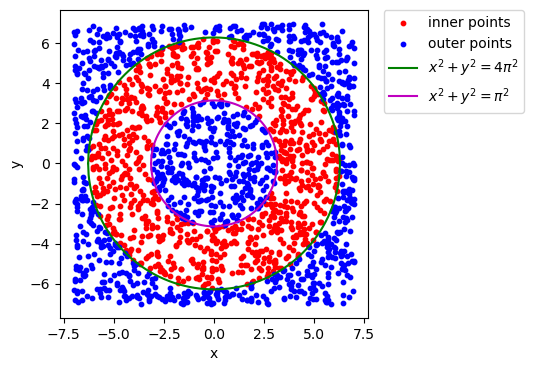

In [3]:
# Monte Carlo integration of the funciton f(x,y) = sin(sqrt(x^2+y^2)) over the domain pi^2<=x^2+y^2<=4*pi^2 

def func(xy):
    # function f(x,y) = sin(sqrt(x^2+y^2))
    
    return abs(np.sin(np.sqrt(np.sum(np.power(xy, 2), axis=1))))

def domain_circles(xy):
    # integration domain: pi^2<=x^2+y^2<=4*pi^2 
    
    return np.pi**2 <= np.sum(np.power(xy, 2)) <= 4*(np.pi**2)

def MonteCarlo_integrate(func, func_domain, mind, maxd, n = 1000):
    # Monte Carlo integration of given function func over domain specified by func_domain
    # Returns estimated integration, inner and outer points of domain
    
    # sample xy
    xy_list = np.random.uniform(mind, maxd, (n, 2))
    
    # determine whether sampled xy is inside or outside of domain and calculate its area
    inside_domain = [func_domain(xy) for xy in xy_list]
    frac_in_domain = sum(inside_domain)/len(inside_domain)
    domain = np.power(mind-maxd, 2) * frac_in_domain
    
    # calculate expected value of func inside domain
    z = func(xy_list)
    z_mean = z[inside_domain].sum()/len(z[inside_domain])
    
    # estimated integration
    integ = domain * z_mean
    
    return integ, np.array(xy_list[inside_domain]), np.array(xy_list[np.invert(inside_domain)])

integ, inner_points, outer_points = MonteCarlo_integrate(func, domain_circles, -7, 7, 2000)
print('Monte Carlo solution:', integ)
print('Analytical solution:', 6*np.pi**2)

#visualize distribution of inner, outer points and domain limits 
fig = plt.figure(figsize=(7, 4))
plt.scatter(inner_points[:,0], inner_points[:,1], s = 10, c = 'r', label = 'inner points')
plt.scatter(outer_points[:,0], outer_points[:,1], s = 10, c = 'b', label = 'outer points')
plt.xlabel('x')
plt.ylabel('y')

r1 = 4*np.pi**2
x1 = np.linspace(-np.sqrt(r1),np.sqrt(r1),500)
y1 = np.sqrt(-x1**2+r1)
r2 = np.pi**2
x2 = np.linspace(-np.sqrt(r2),np.sqrt(r2),500)
y2 = np.sqrt(-x2**2+r2)

plt.plot(x1, y1, 'g')
plt.plot(x1,-y1, 'g', label='$x^2+y^2=4\pi^2$')
plt.plot(x2, y2, 'm')
plt.plot(x2,-y2, 'm', label='$x^2+y^2=\pi^2$')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.gca().set_aspect('equal')
plt.show()
fig.savefig('img/domain_points.png', dpi=200)

Plotting the Monte Carlo integration convergence of the function $f(x,y)=\sin{\sqrt{x^2 + y^2}}$ over the domain $\Omega=    \begin{cases}
      x^2 + y^2\le4\pi^2\\
      x^2 + y^2\ge\pi^2\\
    \end{cases}\,.$

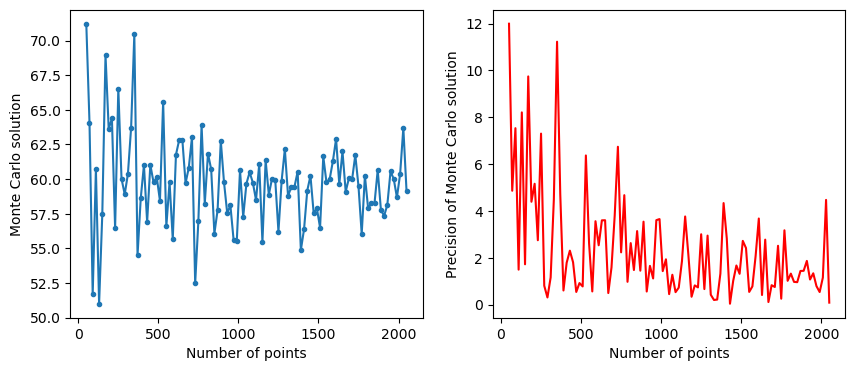

In [6]:
# Plotting the Monte Carlo integration convergence 
# of the funciton f(x,y) = sin(sqrt(x^2+y^2)) over the domain pi^2<=x^2+y^2<=4*pi^2 

n_list = np.arange(50, 2051, 20)
integral_list = [MonteCarlo_integrate(func, domain_circles, -7, 7, n)[0] for n in n_list]
error_list = [abs(6*np.pi**2-val) for val in integral_list]

fig = plt.figure(figsize=(10, 4))

sub1 = fig.add_subplot(121)
sub1.set_xlabel('Number of points')
sub1.set_ylabel('Monte Carlo solution')
sub1.plot(n_list, integral_list, '.-')

sub2 = fig.add_subplot(122)
sub2.set_xlabel('Number of points')
sub2.set_ylabel('Precision of Monte Carlo solution')
sub2.plot(n_list, error_list, 'r')
plt.show()
fig.savefig('img/convergence.png', dpi=200)